<a href="https://colab.research.google.com/github/debora28/projetoPi_2020-1/blob/master/Projeto_data_science_de_criminalidade_em_SP_com_modelo_de_predi%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MODELO DE PREDIÇÃO DE CRIMES DE ROUBO OU FURTO, CONSIDERANDO DETERMINADOS PADRÕES
*O presente modelo tem como base o dataset publicado no Kaggle (https://www.kaggle.com/inquisitivecrow/crime-data-in-brazil) que contém uma coletânea de registros de boletins de ocorrência do estado de São Paulo no período de 2007 a 2016, oriundos do Sistema de Registro Digital de Ocorrências (R.D.O. em www.ssp.sp.gov.br). Os dados foram distribuídos em 21 tabelas, sendo alvo deste estudo apenas a tabela BO_2014_1 referente ao primeiro semestre do ano de 2014. A tabela original continha 954.113 registros de BO's, entretanto, apenas os 10.000 primeiros foram utilizados por motivos de desempenho computacional e por se tratar de um trabalho acadêmico. Os padrões observados para este modelo foram o horário da ocorrência, identificação da delegacia, cidade, idade da pessoa, meio de transporte (aqui chamado de 'conduta'), sexo e profissão, que já constavam no dataset e foram considerados relevantes para a classificação.*

**Equipe**:

Débora Caldas, Renan Urbano, Matheus Guerra, Horlando Leão, Héber Teófilo, Pablo Danillo, Rodrigo Vilemen.

**Siglas e termos:**

*DECAP = Departamento de Polícia Judiciária da Capital;

Descrição das colunas:
* NUM_BO - Identificação numérica do BO,
* ANO_BO - Ano de registro do BO,
* ID_DELEGACIA - Identificação numérica da delegacia,
* NOME_DEPARTAMENTO,
* NOME_SECCIONAL,
* DELEGACIA - Nome da delegacia,
* NOME_DEPARTAMENTO_CIRC - Nome do Departamento por Circunscrição,
* NOME_SECCIONAL_CIRC,
* NOME_DELEGACIA_CIRC,
* ANO - Ano da ocorrência,
* MES - Mês da ocorrência,
* DATA_OCORRENCIA_BO - Data da ocorrência,
* HORA_OCORRENCIA_BO - Hora da ocorrência,
* FLAG_STATUS - Status da ocorrência,
* RUBRICA - Natureza jurídica da ocorrência especificada pelo tipo de crime,
* DESDOBRAMENTO - Detalhamento do processo,
* CONDUTA - Transporte, condução,
* LATITUDE - Coordenada da ocorrência,
* LONGITUDE - Coordenada da ocorrência,
* CIDADE - Cidade da ocorrência,
* LOGRADOURO - Rua da ocorrência,
* NUMERO_LOGRADOURO - Número da Rua,
* FLAG_STATUS.1 - Status da ocorrência,
* DESCR_TIPO_PESSOA - Qualificação da pessoa envolvida na ocorrência,
* CONT_PESSOA - Contagem de pessoas envolvidas na ocorrência,
* SEXO_PESSOA - Sexo da pessoa envolvida,
* IDADE_PESSOA - Idade da pessoa envolvida,
* COR - Cor da pele da pessoa envolvida,
* DESCR_PROFISSAO - Descrição da profissão da pessoa envolvida,
* DESCR_GRAU_INSTRUCAO - Descrição do grau de instrução da pessoa envolvida.


#**1. Imports e upload**

*Importando as bibliotecas necessárias:*

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

*Carregando o arquivo csv do GitHub:*

In [54]:
url = 'https://raw.githubusercontent.com/debora28/pi-2020.2/main/2014-1-10mil.csv'
data = pd.read_csv(url)

#**2. Conhecendo os dados**


*Visão geral da tabela:*



*É formada por 31 colunas, das quais a maior parte é composta por dados qualitativos, organizados como objetos do tipo String:*

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              10000 non-null  int64  
 1   NUM_BO                  10000 non-null  int64  
 2   ANO_BO                  10000 non-null  int64  
 3   ID_DELEGACIA            10000 non-null  int64  
 4   NOME_DEPARTAMENTO       10000 non-null  object 
 5   NOME_SECCIONAL          10000 non-null  object 
 6   DELEGACIA               10000 non-null  object 
 7   NOME_DEPARTAMENTO_CIRC  10000 non-null  object 
 8   NOME_SECCIONAL_CIRC     10000 non-null  object 
 9   NOME_DELEGACIA_CIRC     10000 non-null  object 
 10  ANO                     10000 non-null  int64  
 11  MES                     10000 non-null  int64  
 12  DATA_OCORRENCIA_BO      9913 non-null   object 
 13  HORA_OCORRENCIA_BO      8960 non-null   object 
 14  FLAG_STATUS             10000 non-null 

*Verificamos que as colunas Unnamed: 0 (um índice numérico sem lógica sequencial), Nome_Departamento, Nome_Seccional, Delegacia, Nome_Departamento_Circ, Nome_Seccional_Circ, Nome_Delegacia_Circ, Flag_Status, Desdobramento, Numero_Logradouro, Flag_Status.1 não seriam relevantes nesse contexto, portanto foram removidas:*

In [56]:
data.head()

,Unnamed: 0,NUM_BO,ANO_BO,ID_DELEGACIA,NOME_DEPARTAMENTO,NOME_SECCIONAL,DELEGACIA,NOME_DEPARTAMENTO_CIRC,NOME_SECCIONAL_CIRC,NOME_DELEGACIA_CIRC,...,LOGRADOURO,NUMERO_LOGRADOURO,FLAG_STATUS.1,DESCR_TIPO_PESSOA,CONT_PESSOA,SEXO_PESSOA,IDADE_PESSOA,COR,DESCR_PROFISSAO,DESCR_GRAU_INSTRUCAO
0,243,2,2014,280401,DEMACRO,DEL.SEC.CARAPICUIBA,DISE- DEL.SEC.CARAPICUIBA,DEMACRO,DEL.SEC.CARAPICUIBA,01 D.P. BARUERI,...,R MARIA HELENA,NaN,C,Curador,7,F,51.0,Parda,AUXILIAR DE LIMPEZA,NaN
1,244,2,2014,280401,DEMACRO,DEL.SEC.CARAPICUIBA,DISE- DEL.SEC.CARAPICUIBA,DEMACRO,DEL.SEC.CARAPICUIBA,01 D.P. BARUERI,...,R MARIA HELENA,NaN,C,Indiciado,4,M,19.0,Parda,DESEMPREGADO,1 Grau completo
2,245,2,2014,280401,DEMACRO,DEL.SEC.CARAPICUIBA,DISE- DEL.SEC.CARAPICUIBA,DEMACRO,DEL.SEC.CARAPICUIBA,01 D.P. BARUERI,...,R MARIA HELENA,NaN,C,Testemunha,2,M,38.0,NaN,INVESTIGADOR(A),Superior completo
3,246,2,2014,280401,DEMACRO,DEL.SEC.CARAPICUIBA,DISE- DEL.SEC.CARAPICUIBA,DEMACRO,DEL.SEC.CARAPICUIBA,01 D.P. BARUERI,...,R MARIA HELENA,NaN,C,Testemunha,6,M,23.0,Parda,DESEMPREGADO,2 Grau completo
4,270,3,2014,30314,DEMACRO,DEL.SEC.MOGI DAS CRUZES,DISE- DEL.SEC.MOGI DAS CRUZES,DEMACRO,DEL.SEC.MOGI DAS CRUZES,DEL.POL.ITAQUAQUECETUBA,...,R UBATUBA,162.0,C,Testemunha,1,M,40.0,NaN,POLICIAL CIVIL,2 Grau completo


In [57]:
data = data.drop(columns=['Unnamed: 0', 'NOME_DEPARTAMENTO', 'NOME_SECCIONAL', 'DELEGACIA', 'NOME_DEPARTAMENTO_CIRC', 'NOME_SECCIONAL_CIRC', 'NOME_DELEGACIA_CIRC', 'FLAG_STATUS', 'DESDOBRAMENTO', 'NUMERO_LOGRADOURO', 'FLAG_STATUS.1'], axis=1)
data.head(0)

,NUM_BO,ANO_BO,ID_DELEGACIA,ANO,MES,DATA_OCORRENCIA_BO,HORA_OCORRENCIA_BO,RUBRICA,CONDUTA,LATITUDE,LONGITUDE,CIDADE,LOGRADOURO,DESCR_TIPO_PESSOA,CONT_PESSOA,SEXO_PESSOA,IDADE_PESSOA,COR,DESCR_PROFISSAO,DESCR_GRAU_INSTRUCAO


*A tabela atual possui 10.000 linhas (1,05% do total original de 954.113 linhas) e 20 colunas (já que 11 foram removidas anteriormente):*

In [58]:
data.shape

(10000, 20)

#**3. Limpando e tratando os dados**

*É necessário remover campos nulos (NA - Not Available e NaN - Not a Number) na tabela ou preenchê-los para aumentar a qualidade dos dados, portanto, o próximo passo é procurar quais colunas possuem campos Na ou NaN (True):*

In [59]:
data.isnull().any()

,0
NUM_BO,False
ANO_BO,False
ID_DELEGACIA,False
ANO,False
MES,False
DATA_OCORRENCIA_BO,True
HORA_OCORRENCIA_BO,True
RUBRICA,False
CONDUTA,True
LATITUDE,True


*Então, é preciso quantificar esses campos nulos para se ter uma ideia de quais colunas são mais críticas ou passíveis de serem removidas por insuficiência de dados:*

In [60]:
print(data.isnull().sum())

NUM_BO                     0
ANO_BO                     0
ID_DELEGACIA               0
ANO                        0
MES                        0
DATA_OCORRENCIA_BO        87
HORA_OCORRENCIA_BO      1040
RUBRICA                    0
CONDUTA                 4835
LATITUDE                1593
LONGITUDE               1593
CIDADE                     0
LOGRADOURO               429
DESCR_TIPO_PESSOA          0
CONT_PESSOA                0
SEXO_PESSOA                0
IDADE_PESSOA            1902
COR                     2372
DESCR_PROFISSAO         3002
DESCR_GRAU_INSTRUCAO    2832
dtype: int64


In [61]:
data.isnull().sum().sum()

np.int64(19685)

*Podemos ver que há 19.685 campos vazios na tabela distribuídos em 10 colunas.*

*Avaliamos que seria melhor completá-los com os valores mais frequentes de cada coluna. No caso da coluna CONDUTA, a palavra 'Veículo' ocorreu com mais frequência, ou seja, a maioria dos envolvidos estava com um veículo no momento da ocorrência, então essa será usada para preencher os campos vazios.*

In [62]:
data['CONDUTA'].value_counts()

,count
CONDUTA,
VEICULO,1386
TRANSEUNTE,1369
OUTROS,681
RESIDENCIA,422
INTERIOR DE VEICULO,354
ESTABELECIMENTO COMERCIAL,326
CARGA,273
INTERIOR ESTABELECIMENTO,112
ESTABELECIMENTO BANCARIO,75


In [63]:
data['CONDUTA'].fillna('VEICULO', inplace=True)

<ipython-input-63-b024ed0cde74>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['CONDUTA'].fillna('VEICULO', inplace=True)


*O mesmo foi feito com as demais colunas:
Na coluna LATITUDE, o valor '-23.71286115' é o mais indicado para preencher os campos.*

In [64]:
data['LATITUDE'].value_counts()

,count
LATITUDE,
-2.371.286.115,48
-2.352.519.435,23
-2.364.027.263,23
-2.347.103.556,22
-2.355.850.851,22
...,...
-2.366.681.788,1
-2.368.907.513,1
-2.369.494.436,1


In [65]:
data['LATITUDE'].isnull().sum()

np.int64(1593)

In [66]:
data['LATITUDE'].fillna('-2.371286115', inplace=True)

<ipython-input-66-f22a54793c92>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['LATITUDE'].fillna('-2.371286115', inplace=True)


In [67]:
data['LATITUDE'].isnull().sum()

np.int64(0)

*E na coluna LONGITUDE, o valor '-46.78186771' é o mais indicado.*

In [68]:
data['LONGITUDE'].value_counts()

,count
LONGITUDE,
-4.678.186.771,48
-4.639.605.905,23
-4.681.568.811,23
-4.672.128.418,22
-4.661.519.738,22
...,...
-4.642.227.659,1
-467.463.154,1
-465.441.367,1


In [69]:
data['LONGITUDE'].fillna('-4.678186771', inplace=True)

<ipython-input-69-8c9b58e13754>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['LONGITUDE'].fillna('-4.678186771', inplace=True)


In [70]:
data['LONGITUDE'].isnull().sum()

np.int64(0)

*De igual modo, '01/01/2014' é a data que mais aparece:*

In [71]:
data['DATA_OCORRENCIA_BO'].value_counts()

,count
DATA_OCORRENCIA_BO,
01/01/2014,2556
02/01/2014,1443
03/01/2014,911
06/01/2014,550
04/01/2014,415
...,...
04/05/2014,1
23/05/2014,1
30/05/2014,1


In [72]:
data['DATA_OCORRENCIA_BO'].fillna('01/01/2014', inplace=True)

<ipython-input-72-d7a189ee366d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['DATA_OCORRENCIA_BO'].fillna('01/01/2014', inplace=True)


In [73]:
data['DATA_OCORRENCIA_BO'].isnull().sum()

np.int64(0)

*Bem como o horário '12:00':*

In [74]:
data['HORA_OCORRENCIA_BO'].value_counts()

,count
HORA_OCORRENCIA_BO,
12:00,239
15:00,218
16:00,207
14:00,204
01:00,201
...,...
16:55,1
21:14,1
15:33,1


In [75]:
data['HORA_OCORRENCIA_BO'].fillna('12:00', inplace=True)

<ipython-input-75-9588b813a943>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['HORA_OCORRENCIA_BO'].fillna('12:00', inplace=True)


In [76]:
data['HORA_OCORRENCIA_BO'].isnull().sum()

np.int64(0)

*A Avenida Sapopemba é o logradouro mais citado:*




In [77]:
data['LOGRADOURO'].value_counts()

,count
LOGRADOURO,
AV SAPOPEMBA,65
EST DO M BOI MIRIM,54
AV DO ESTADO,39
R APA,35
AV CELSO GARCIA,34
...,...
R FREIRE DE ANDRADE,1
R CARLOS GONZALES,1
R MARTINS RODRIGUES,1


In [78]:
data['LOGRADOURO'].fillna('AV SAPOPEMBA', inplace=True)

<ipython-input-78-8947a9b3b76a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['LOGRADOURO'].fillna('AV SAPOPEMBA', inplace=True)


*E a cor da pele da maioria das pessoas envolvidas é branca, seguida da cor parda:*

In [79]:
data['COR'].value_counts()

,count
COR,
Branca,4166
Parda,2517
Preta,575
Outros,334
Amarela,36


In [80]:
data['COR'].fillna('Branca', inplace=True)

<ipython-input-80-c637eb4ec16b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['COR'].fillna('Branca', inplace=True)


*Foi verificado também que a idade média (51 anos) não refletia a realidade, já que foi elevada pela ocorrência atípica de pessoa com 100 anos, estando a maioria entre 26 e 38 anos. Portanto, a idade usada para preencher os espaços, em lugar de usar a média, foi de 30 anos que foi a mais frequente, apesar de haver outros registros com quantidades bem próximas:*

In [81]:
data['IDADE_PESSOA'].mean

<bound method Series.mean of 0       51.0
1       19.0
2       38.0
3       23.0
4       40.0
        ... 
9995    35.0
9996    29.0
9997    41.0
9998    46.0
9999    26.0
Name: IDADE_PESSOA, Length: 10000, dtype: float64>

In [82]:
data['IDADE_PESSOA'].value_counts()

,count
IDADE_PESSOA,
30.0,269
26.0,260
33.0,256
28.0,245
38.0,241
...,...
89.0,1
76.0,1
90.0,1


In [83]:
data['IDADE_PESSOA'].fillna('30', inplace=True)

<ipython-input-83-c7409bc715a8>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '30' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data['IDADE_PESSOA'].fillna('30', inplace=True)


*A profissão que mais apareceu nos BOs foi a de policial (militar e civil), talvez em decorrência da periculosidade típica do ofício:*

In [84]:
data['DESCR_PROFISSAO'].value_counts()

,count
DESCR_PROFISSAO,
POLICIAL MILITAR,827
POLICIAL CIVIL,721
ESTUDANTE,308
MOTORISTA,300
DESEMPREGADO,281
...,...
ENCADERNADOR(A),1
AUXILIAR DE MECANICO,1
OPERADOR DE TRIAGEM/TRASBORDO,1


In [85]:
data['DESCR_PROFISSAO'].fillna('POLICIAL MILITAR', inplace=True)

<ipython-input-85-0311f711da46>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['DESCR_PROFISSAO'].fillna('POLICIAL MILITAR', inplace=True)


*E, por fim, verificamos que a maioria tem o segundo grau completo:*

In [86]:
data['DESCR_GRAU_INSTRUCAO'].value_counts()

,count
DESCR_GRAU_INSTRUCAO,
2 Grau completo,2780
1 Grau completo,1882
Superior completo,1310
1 Grau incompleto,574
Superior incompleto,321
2 Grau incompleto,227
Analfabeto,74


In [87]:
data['DESCR_GRAU_INSTRUCAO'].fillna('2 Grau completo', inplace=True)

<ipython-input-87-af069cba067b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['DESCR_GRAU_INSTRUCAO'].fillna('2 Grau completo', inplace=True)


*Agora conferimos que os campos estão totalmente preenchidos, então a pesquisa por nulos retorna False:*

In [88]:
print(data.isnull().any())

NUM_BO                  False
ANO_BO                  False
ID_DELEGACIA            False
ANO                     False
MES                     False
DATA_OCORRENCIA_BO      False
HORA_OCORRENCIA_BO      False
RUBRICA                 False
CONDUTA                 False
LATITUDE                False
LONGITUDE               False
CIDADE                  False
LOGRADOURO              False
DESCR_TIPO_PESSOA       False
CONT_PESSOA             False
SEXO_PESSOA             False
IDADE_PESSOA            False
COR                     False
DESCR_PROFISSAO         False
DESCR_GRAU_INSTRUCAO    False
dtype: bool


*Aparentemente, as colunas não guardam nenhuma correlação entre si, de acordo com a matriz de correlação abaixo, na qual nenhum coeficiente ultrapassa 0.5, o que pode significar que não há influência em comum entre elas:
(Obs.: As colunas ANO_BO e ANO foram abstraídas)*

In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   NUM_BO                10000 non-null  int64 
 1   ANO_BO                10000 non-null  int64 
 2   ID_DELEGACIA          10000 non-null  int64 
 3   ANO                   10000 non-null  int64 
 4   MES                   10000 non-null  int64 
 5   DATA_OCORRENCIA_BO    10000 non-null  object
 6   HORA_OCORRENCIA_BO    10000 non-null  object
 7   RUBRICA               10000 non-null  object
 8   CONDUTA               10000 non-null  object
 9   LATITUDE              10000 non-null  object
 10  LONGITUDE             10000 non-null  object
 11  CIDADE                10000 non-null  object
 12  LOGRADOURO            10000 non-null  object
 13  DESCR_TIPO_PESSOA     10000 non-null  object
 14  CONT_PESSOA           10000 non-null  int64 
 15  SEXO_PESSOA           10000 non-null 

In [90]:
df = data[['ANO', 'MES', 'CONT_PESSOA']]

In [91]:
corr = df.corr()
corr

,ANO,MES,CONT_PESSOA
ANO,NaN,NaN,NaN
MES,NaN,1.000000,0.075964
CONT_PESSOA,NaN,0.075964,1.000000


<Axes: >

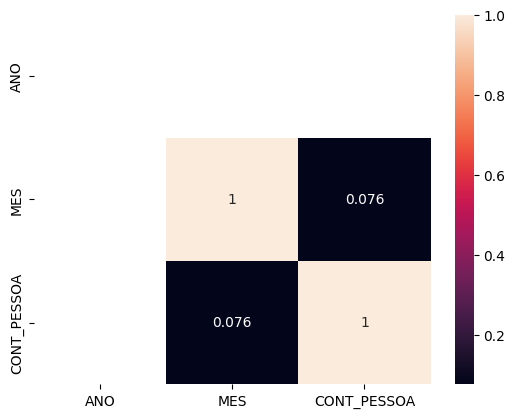

In [92]:
sns.heatmap(corr, annot=True)

**Visualizando o mapa de calor para a ocorrência de crimes por região geográfica do estado de São Paulo.**

*Para construir o mapa, precisamos instalar a biblioteca "folium" e formatar as coordenadas:*

In [94]:
!pip install git+https://github.com/python-visualization/folium

  Cloning https://github.com/python-visualization/folium to /tmp/pip-req-build-at2i0150
  Running command git clone --filter=blob:none --quiet https://github.com/python-visualization/folium /tmp/pip-req-build-at2i0150
  Resolved https://github.com/python-visualization/folium to commit 8e09fb812887860518e7de0eb1e3d539f01a804c
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for folium: filename=folium-0.19.7.dev2+g8e09fb8-py2.py3-none-any.whl size=112654 sha256=5dced9c484f1ebddfa7d90b33f37839257f9088eff0952bdfa0646cd047b5355
  Stored in directory: /tmp/pip-ephem-wheel-cache-josunqw2/wheels/ac/17/dc/a0d51fd8eb551825435f1f50b0c02fdf4ddcb45c9a02b722aa
Successfully built folium
  Attempting uninstall: folium
    Found existing installation: folium 0.19.5
    Uninstalling folium-0.19.5:
      Successfully uninstalled folium-0.19.5


In [97]:
def formata_latitude(column_csv):

  def replace_location(string):
    string = (string.replace('.',''))
    string = '{0}{1}{2}'.format(string[0:3], '.', string[3:])
    return string

  newArray = []
  for x in column_csv:
    newArray.append(replace_location(x))

  coord = pd.DataFrame(newArray)
  coord.to_csv("coordenadas.csv")
  return (coord)

In [98]:
data['LATITUDE'] = formata_latitude(data['LATITUDE'])
data['LONGITUDE'] = formata_latitude(data['LONGITUDE'])

In [107]:
import os
import folium
import pandas as pd
print(folium.__version__)
from folium import plugins

coordenadas = []
lat = data['LATITUDE'][:10000].values
long = data['LONGITUDE'][:10000].values

mapa = folium.Map(location=[-23.6, -46.6], zoom_start=12)

for la,lo in zip(lat,long):
    coordenadas.append([la,lo])

mapa.add_child(plugins.HeatMap(coordenadas))
mapa

0.19.5


#**3.1 Convertendo dados categóricos em numéricos (one-hot-encoding)**
*A fim de construir nosso modelo de predição, precisamos separar os dois tipos de crime de interesse, furto e roubo, da coluna alvo 'RUBRICA'. Como a coluna Rubrica é formada por valores não-numéricos (nomes dos tipos de crimes), é preciso executar a codificação one-hot, tranformando cada campo em uma nova coluna contendo apenas números:*



In [108]:
novas_colunas = pd.get_dummies(data['RUBRICA'])
data = pd.concat([data,novas_colunas], axis=1)
data.head(2)

,NUM_BO,ANO_BO,ID_DELEGACIA,ANO,MES,DATA_OCORRENCIA_BO,HORA_OCORRENCIA_BO,RUBRICA,CONDUTA,LATITUDE,...,Furto qualificado,Homicidio,Homicidio culposo,Homicidio culposo por veiculo,Homicidio qualificado,Lesao corporal,Lesao corporal de natureza GRAVE,Lesao corporal seguida de morte,Lesao culposa por veiculo,Roubo
0,2,2014,280401,2014,2,26/02/2014,17:00,Drogas,VEICULO,-23.71286115,...,False,False,False,False,False,False,False,False,False,False
1,2,2014,280401,2014,2,26/02/2014,17:00,Drogas,VEICULO,-23.71286115,...,False,False,False,False,False,False,False,False,False,False


*A partir daí, podemos observar que o roubo é o crime mais comum e que o furto foi dividido em duas categorias (simples e qualificado).*

In [109]:
data['RUBRICA'].value_counts()

,count
RUBRICA,
Roubo,3630
Lesao corporal,1875
Drogas,1694
Furto,1012
Furto qualificado,633
Lesao culposa por veiculo,595
Homicidio,279
Estupro de vulneravel,103
Homicidio qualificado,96


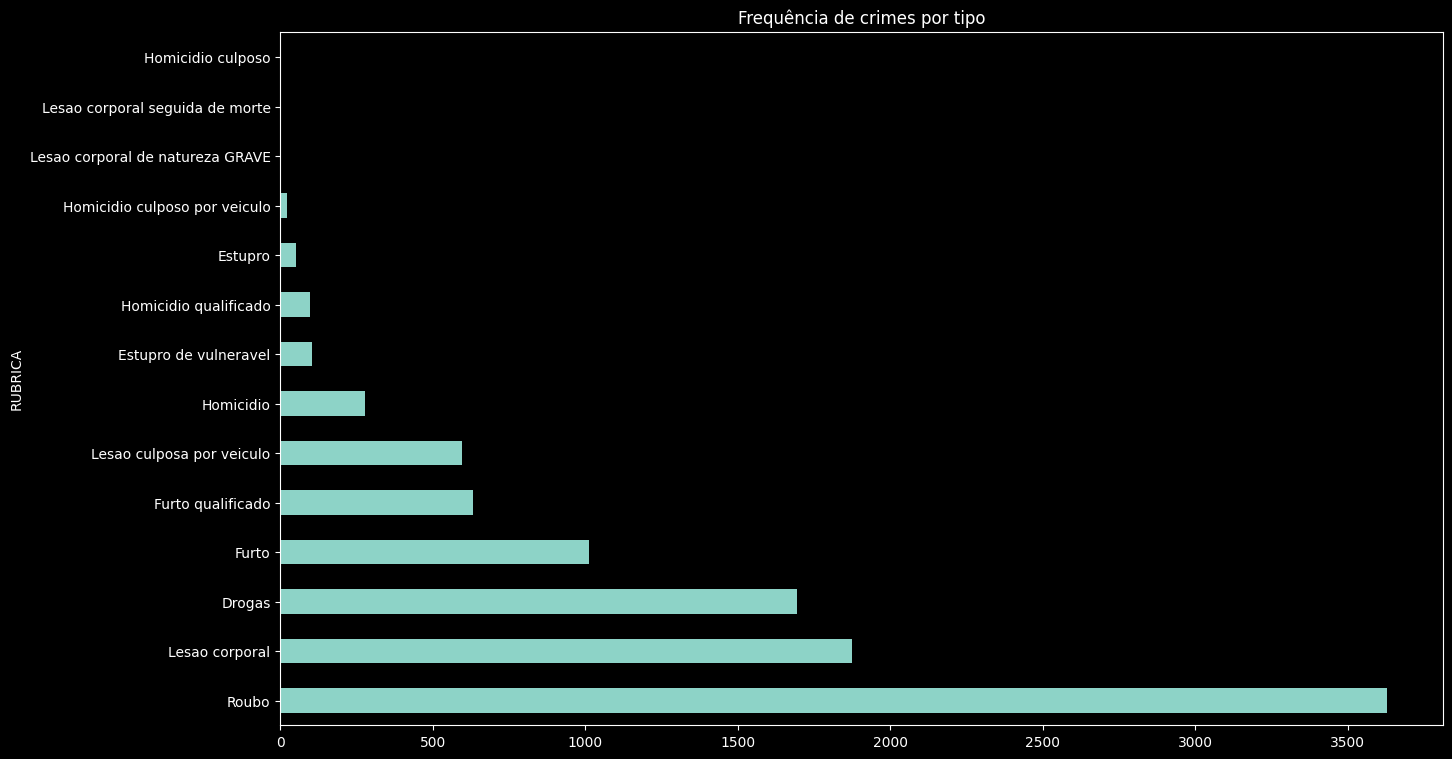

In [110]:
plt.style.use('dark_background')
plt.figure(figsize=(15,9))
plt.xlabel('Número de Crimes')
data['RUBRICA'].value_counts().plot(kind='barh', title='Frequência de crimes por tipo')
plt.rcParams.update({'font.size': 20})
plt.show()

*Para o nosso estudo, precisamos somar essas três colunas (Roubo, Furto e Furto qualificado) que estão relacionadas aos Crimes Violentos contra o Patrimônio (CVP). Então, criamos uma nova coluna ('FURTO-ROUBO') com o somatório dos casos de furto e roubo, excluindo outros tipos de crimes:*

In [111]:
data['FURTO-ROUBO'] = data['Roubo'] + data['Furto'] + data['Furto qualificado']
data.head(10)

,NUM_BO,ANO_BO,ID_DELEGACIA,ANO,MES,DATA_OCORRENCIA_BO,HORA_OCORRENCIA_BO,RUBRICA,CONDUTA,LATITUDE,...,Homicidio,Homicidio culposo,Homicidio culposo por veiculo,Homicidio qualificado,Lesao corporal,Lesao corporal de natureza GRAVE,Lesao corporal seguida de morte,Lesao culposa por veiculo,Roubo,FURTO-ROUBO
0,2,2014,280401,2014,2,26/02/2014,17:00,Drogas,VEICULO,-23.71286115,...,False,False,False,False,False,False,False,False,False,False
1,2,2014,280401,2014,2,26/02/2014,17:00,Drogas,VEICULO,-23.71286115,...,False,False,False,False,False,False,False,False,False,False
2,2,2014,280401,2014,2,26/02/2014,17:00,Drogas,VEICULO,-23.71286115,...,False,False,False,False,False,False,False,False,False,False
3,2,2014,280401,2014,2,26/02/2014,17:00,Drogas,VEICULO,-23.71286115,...,False,False,False,False,False,False,False,False,False,False
4,3,2014,30314,2014,1,14/01/2014,17:00,Drogas,VEICULO,-23.48960369,...,False,False,False,False,False,False,False,False,False,False
5,1,2014,210106,2014,1,06/01/2014,11:00,Drogas,VEICULO,-23.71286115,...,False,False,False,False,False,False,False,False,False,False
6,1,2014,210106,2014,1,06/01/2014,11:00,Drogas,VEICULO,-23.71286115,...,False,False,False,False,False,False,False,False,False,False
7,2,2014,30641,2014,1,02/01/2014,16:10,Drogas,VEICULO,-23.55277328,...,False,False,False,False,False,False,False,False,False,False
8,2,2014,210102,2014,1,08/01/2014,15:00,Drogas,VEICULO,-23.61894605,...,False,False,False,False,False,False,False,False,False,False
9,2,2014,210102,2014,1,08/01/2014,15:00,Drogas,VEICULO,-23.61894605,...,False,False,False,False,False,False,False,False,False,False


# **4. Conclusões**

*Podemos concluir que em média pelo menos 50% dos boletins tinham apenas 2 envolvidos (vítima ou não) e que pelo menos 75% das ocorrências se concentram no mês de janeiro, ainda que os registros sejam de apenas metade do ano. Talvez por esse ser geralmente período de férias o que inclui maior movimentação de pessoas nas ruas e em espaços públicos:*

In [112]:
data.describe()

,NUM_BO,ANO_BO,ID_DELEGACIA,ANO,MES,CONT_PESSOA
count,10000.000000,10000.0,10000.000000,10000.0,10000.000000,10000.000000
mean,24.377100,2014.0,76819.235900,2014.0,1.362000,2.625500
std,16.054192,0.0,110985.447337,0.0,0.898909,1.934276
min,1.000000,2014.0,10004.000000,2014.0,1.000000,1.000000
25%,11.000000,2014.0,10365.000000,2014.0,1.000000,1.000000
50%,21.000000,2014.0,30211.000000,2014.0,1.000000,2.000000
75%,37.000000,2014.0,140206.000000,2014.0,1.000000,3.000000
max,63.000000,2014.0,990900.000000,2014.0,6.000000,17.000000


*Inclusive, os envolvidos são em sua maioria homens. Fato este que talvez contenha alguma relação com o que foi apontado anteriormente (de que a maior parte dos crimes foi sofrido por policiais), considerando as estatísticas de que a área é majoritariamente masculina, apesar da mudança de contexto dos últimos anos:*

In [113]:
data.groupby(by='SEXO_PESSOA').size()

,0
SEXO_PESSOA,
F,2335
I,166
M,7499


*Corroborando as conclusões anteriores, os dados mostram que 8.126 crimes aconteceram no mês de janeiro em valores absolutos, os quais representam 81,26% do total do semestre (10.000 ocorrências).*

In [114]:
data['MES'].value_counts()

,count
MES,
1,8126
2,904
3,481
4,278
5,135
6,76


In [115]:
data['MES'].value_counts().sum()

np.int64(10000)

In [116]:
mes = data["MES"]

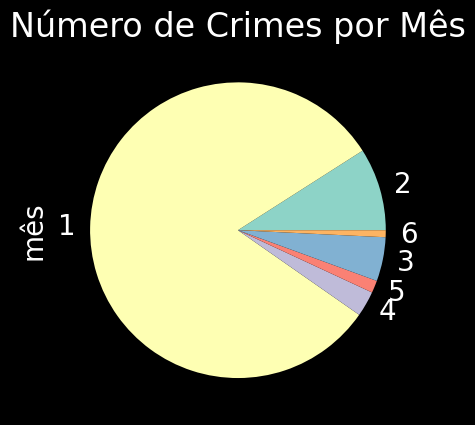

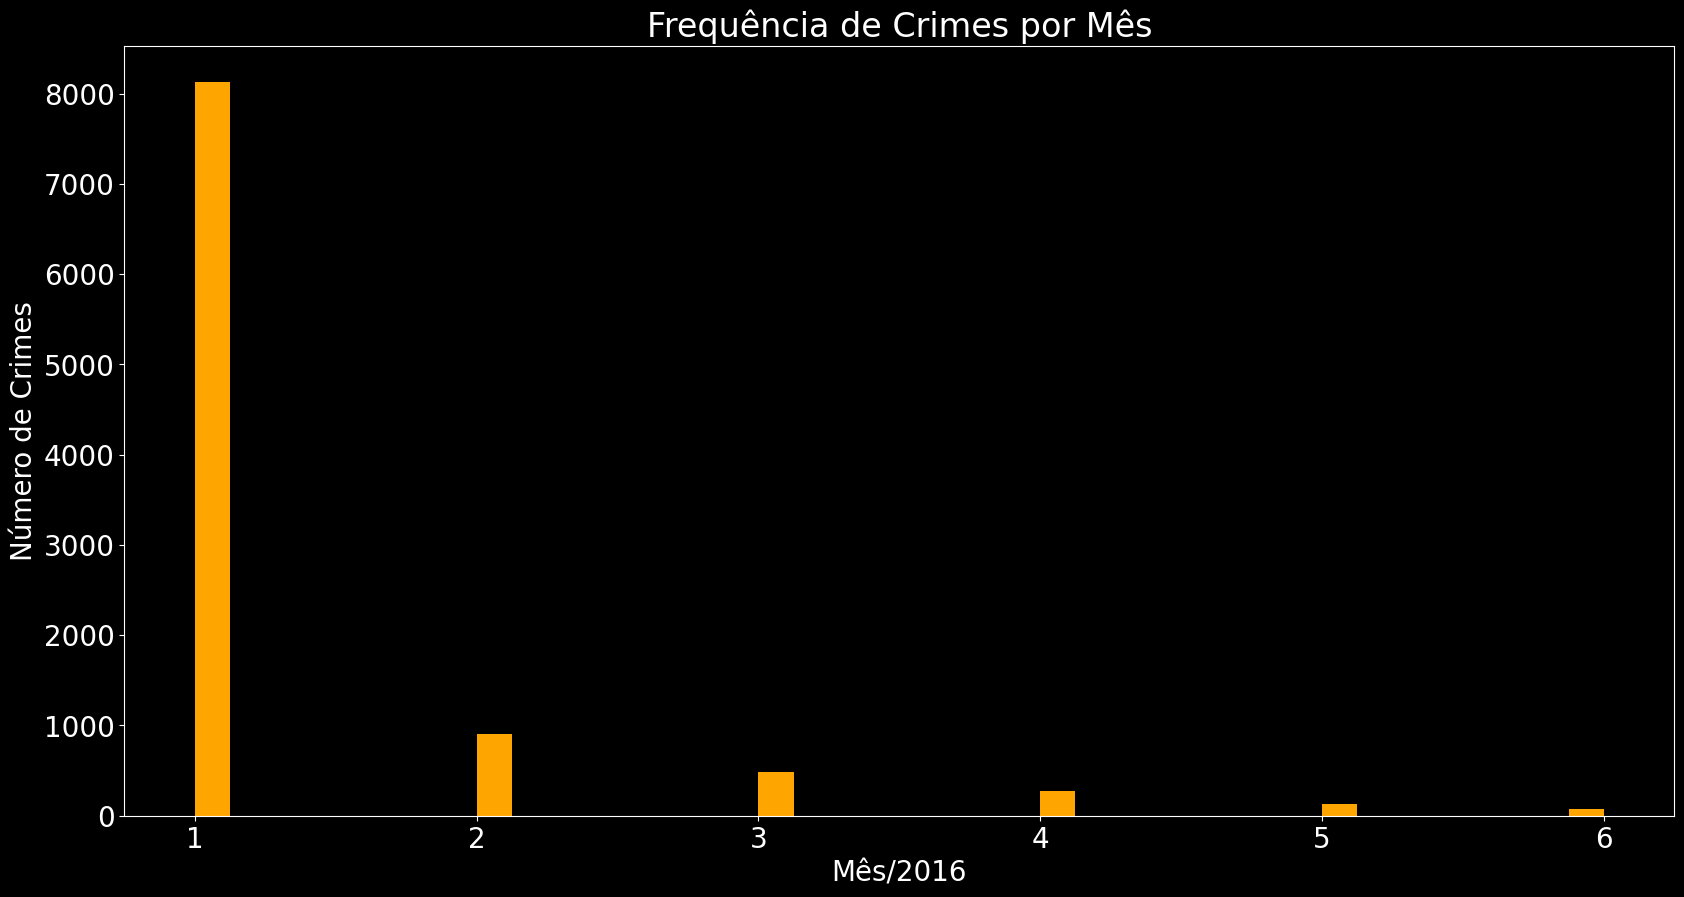

In [117]:
plt.style.use('dark_background')
plt.title('Número de Crimes por Mês')
data['MES'].value_counts(sort=False).plot.pie()
plt.ylabel('mês')
plt.rcParams.update({'font.size': 20})
plt.show()
plt.figure(figsize=(20,10))
plt.hist(mes, bins=40, color = "orange", ec="orangered")
plt.title('Frequência de Crimes por Mês')
plt.ylabel('Número de Crimes')
plt.xlabel('Mês/2016')
plt.rcParams.update({'font.size': 20})
plt.show()

*Foi necessário aplicar uma função para separar as horas da coluna e convertê-las de string para inteiro para manter a ordenação numérica no gráfico. Assim, a partir deste, claramente podemos ver o pico de criminalidade ocorrer aproximadamente ao meio-dia:*

In [118]:
hora = data['HORA_OCORRENCIA_BO'].apply(lambda x: str(x)[:2])

In [119]:
hora = hora.astype(int)

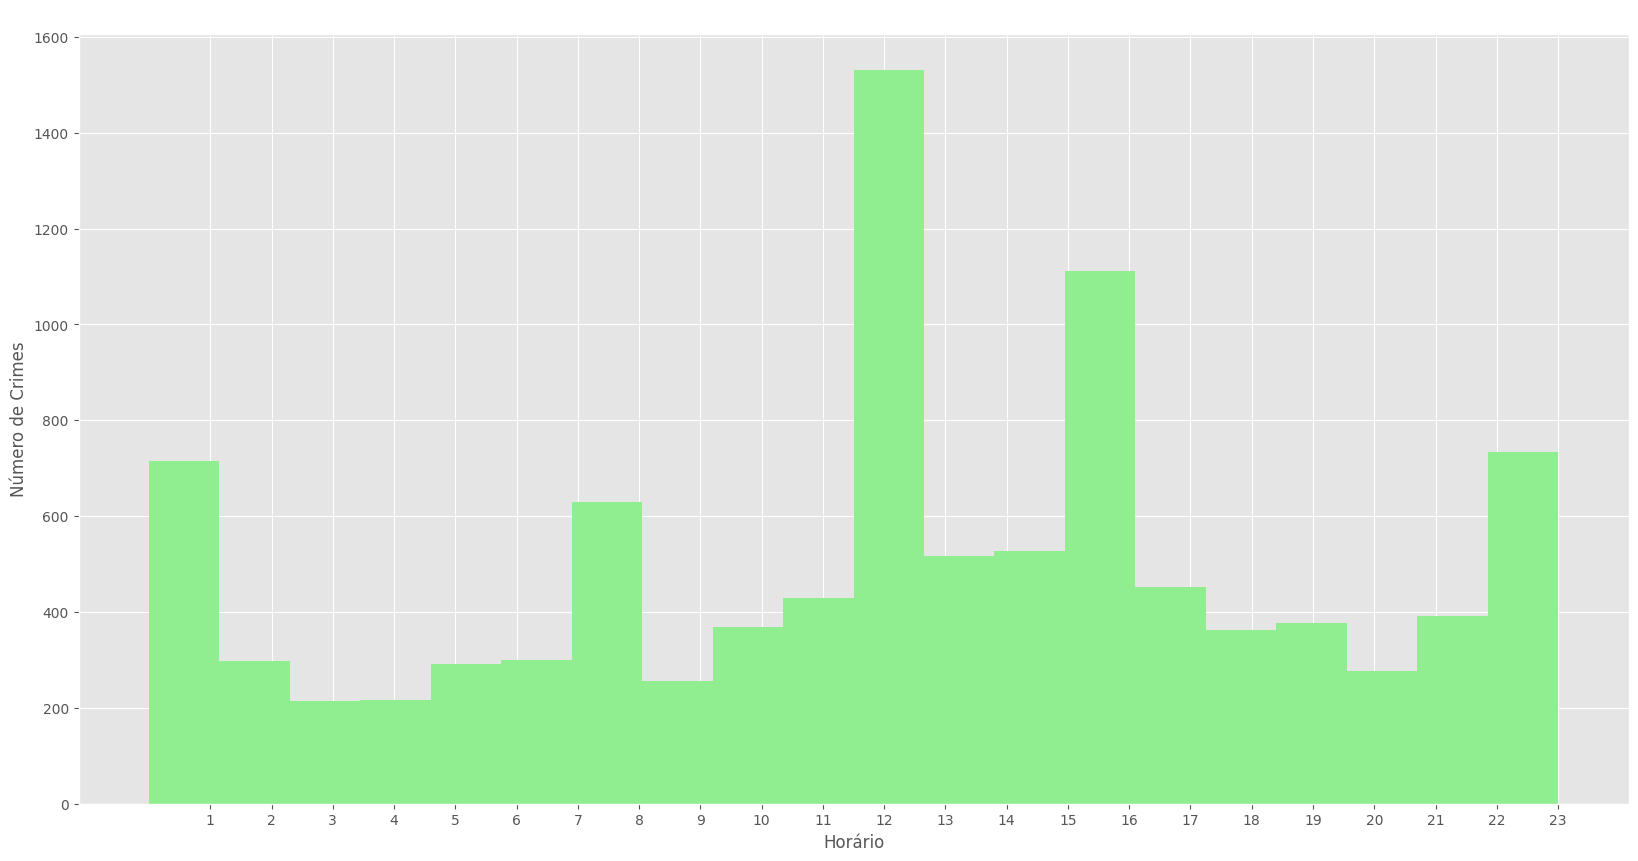

In [120]:
import scipy.stats as st
plt.style.use('ggplot')
plt.figure(figsize=(20,10))
plt.hist(hora, bins=20, color = "lightgreen", ec="black")
plt.title('Número de Crimes por Hora')
plt.ylabel('Número de Crimes')
plt.xlabel('Horário')
plt.xticks(range(1, 24))
plt.rcParams.update({'font.size': 20})
plt.show()

*Observamos também o quanto as ocorrências estão concentradas na capital (5.594, o que representa quase 56% do total), certamente devido à densidade populacional desta área:*

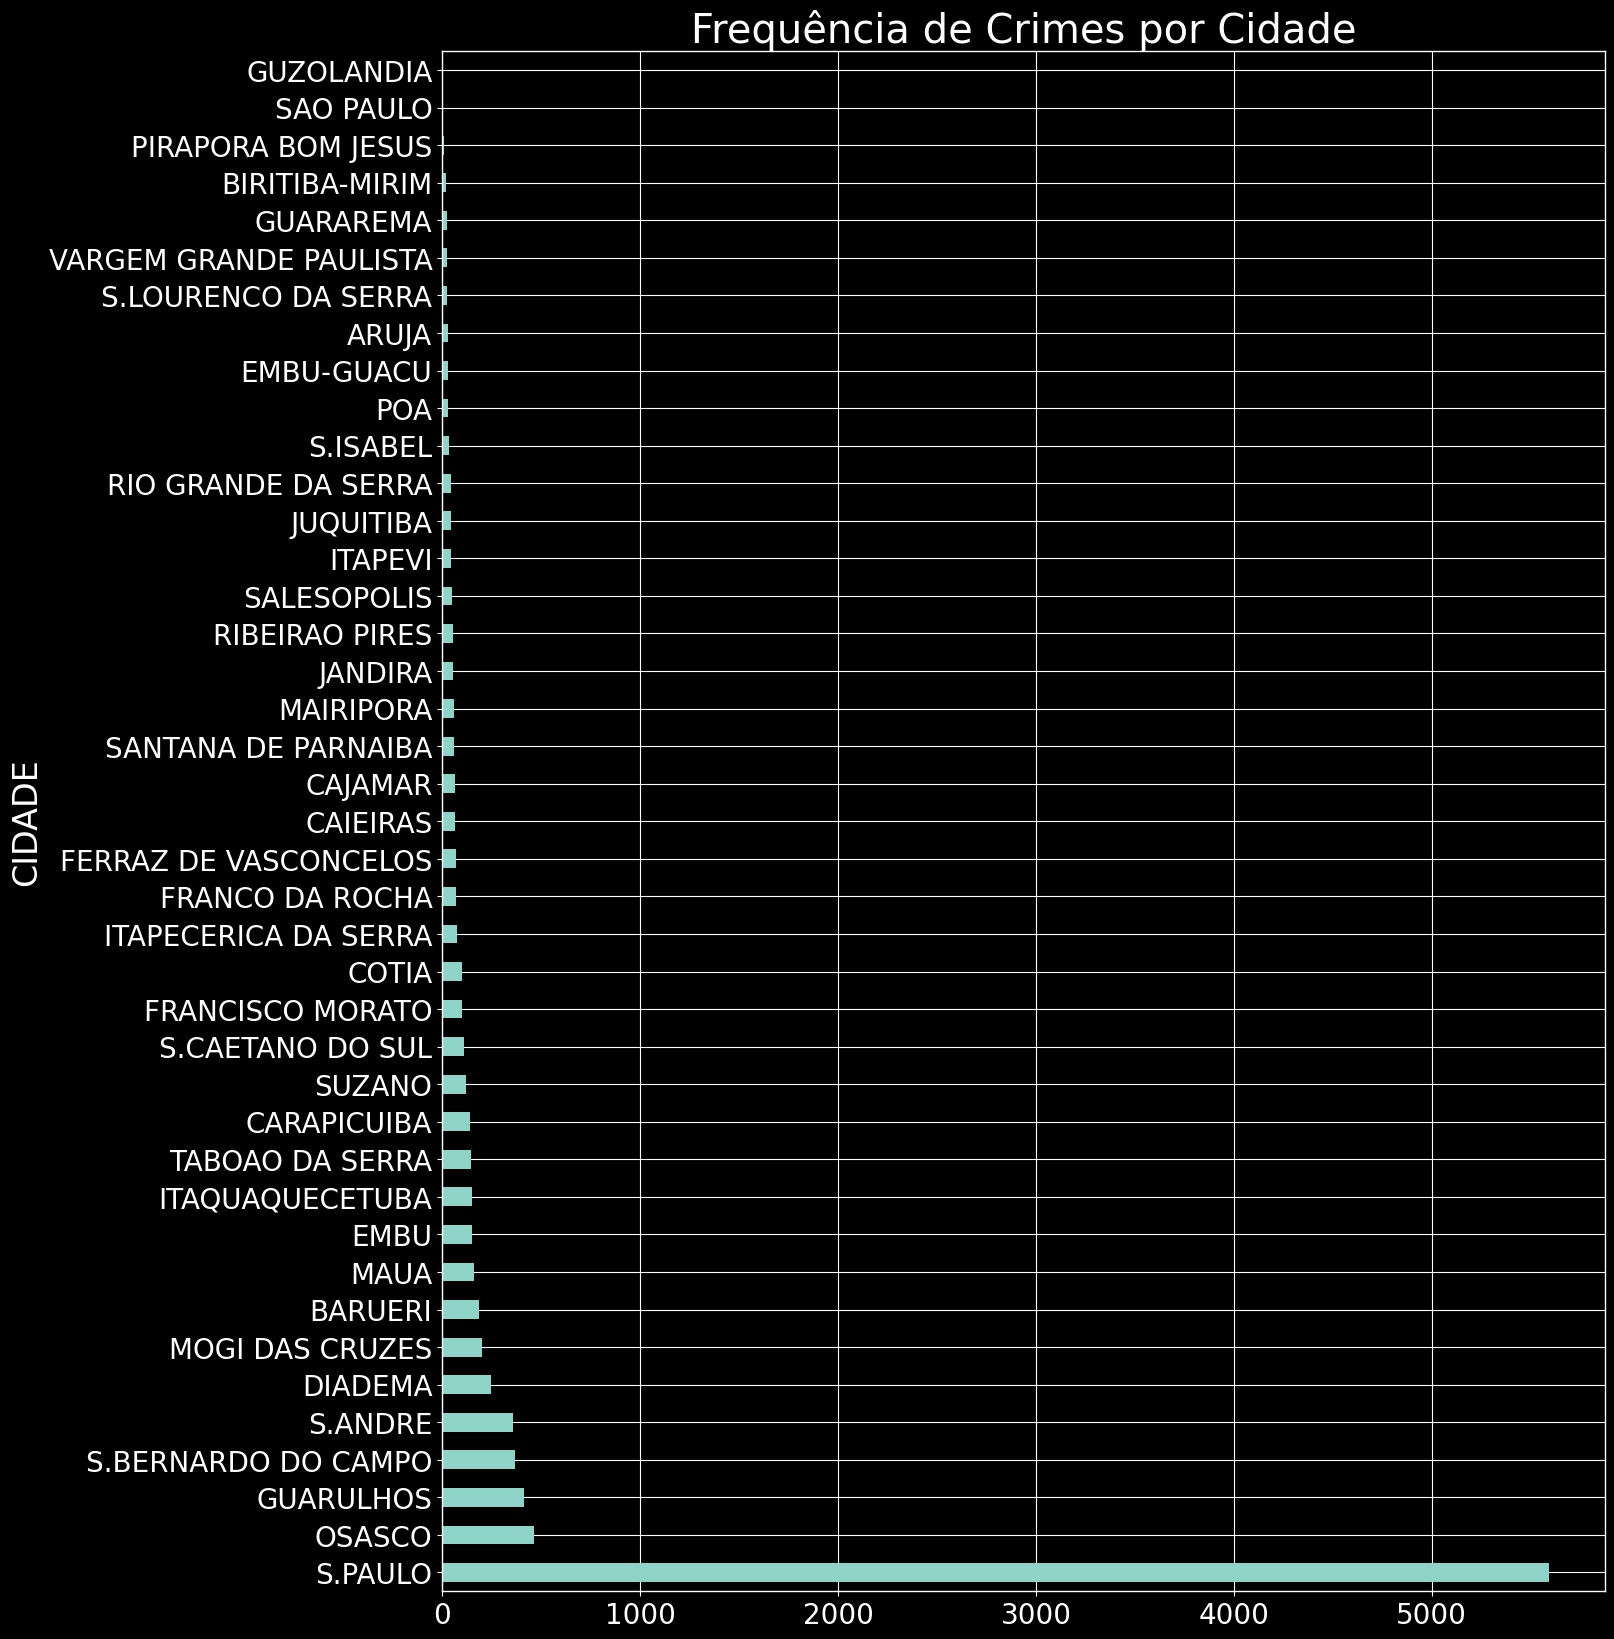

In [121]:
plt.style.use('dark_background')
plt.figure(figsize=(15, 20))
plt.xlabel('Número de Crimes')
data['CIDADE'].value_counts().plot(kind='barh', title='Frequência de Crimes por Cidade')
plt.rcParams.update({'font.size': 20})
plt.show()

In [122]:
data['CIDADE'].value_counts()

,count
CIDADE,
S.PAULO,5594
OSASCO,462
GUARULHOS,416
S.BERNARDO DO CAMPO,369
S.ANDRE,356
DIADEMA,248
MOGI DAS CRUZES,203
BARUERI,184
MAUA,162


In [123]:
data['CIDADE'].value_counts(normalize=True)

,proportion
CIDADE,
S.PAULO,0.5594
OSASCO,0.0462
GUARULHOS,0.0416
S.BERNARDO DO CAMPO,0.0369
S.ANDRE,0.0356
DIADEMA,0.0248
MOGI DAS CRUZES,0.0203
BARUERI,0.0184
MAUA,0.0162


# **5. Preparando os dados para o modelo de predição**

O pré-processamento dos dados precisou ser feito por meio da classe LabelEncoder da biblioteca Scikit-Learn devido à natureza categórica das colunas do dataset e porque o modelo de predição não lida com variáveis nominais. O one-hot-encoding e métodos de conversão de tipo não se mostraram eficientes.

In [ ]:
le = preprocessing.LabelEncoder()
le.fit(data['HORA_OCORRENCIA_BO'])
data['HORA_OCORRENCIA_BO'] = le.transform(data['HORA_OCORRENCIA_BO'])

In [ ]:
le = preprocessing.LabelEncoder()
le.fit(data['ID_DELEGACIA'])
data['ID_DELEGACIA'] = le.transform(data['ID_DELEGACIA'])

In [ ]:
le = preprocessing.LabelEncoder()
le.fit(data['CIDADE'])
data['CIDADE'] = le.transform(data['CIDADE'])

In [ ]:
le = preprocessing.LabelEncoder()
le.fit(data['CONDUTA'])
data['CONDUTA'] = le.transform(data['CONDUTA'])

In [ ]:
le = preprocessing.LabelEncoder()
le.fit(data['SEXO_PESSOA'])
data['SEXO_PESSOA'] = le.transform(data['SEXO_PESSOA'])

In [ ]:
le = preprocessing.LabelEncoder()
le.fit(data['DESCR_PROFISSAO'])
data['DESCR_PROFISSAO'] = le.transform(data['DESCR_PROFISSAO'])

In [ ]:
le = preprocessing.LabelEncoder()
le.fit(data['RUBRICA'])
data['RUBRICA'] = le.transform(data['RUBRICA'])

#**5.1 Separando a variável alvo**

Com os dados prontos, separamos as colunas entre os parâmetros (hora, cidade, pessoa, etc) e a variável alvo ('FURTO-ROUBO', o qual abrange apenas os campos Furto e Roubo da coluna 'RUBRICA'). O modelo, portanto, classifica se a situação analisada se trata de um crime de subtração de bens ou não (visto que vários outros crimes são listados, como lesão corporal, porte de drogas ilícitas, etc).

In [ ]:
x = data[['HORA_OCORRENCIA_BO','ID_DELEGACIA','CIDADE','IDADE_PESSOA','CONDUTA','SEXO_PESSOA','DESCR_PROFISSAO']].copy()
y = data[['FURTO-ROUBO']].copy()

#**5.2 Dividindo dados em teste e treinamento**

Segundo a literatura, é comum dividir os dados em duas partes, 1/3 para teste e o restante para treinamento:

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=3000)

#**5.3 Criando modelo de ML**

O modelo criado é uma árvore de decisão, que é um algoritmo de classificação, e neste caso o tipo de aprendizado foi o supervisionado (pois os dados de treino estão etiquetados).

In [ ]:
tipos_crimes_classifier = DecisionTreeClassifier(max_leaf_nodes=7000, random_state=1)
tipos_crimes_classifier.fit(x_train, y_train)

In [ ]:
print(tipos_crimes_classifier)

#**6. Fazendo predição**

Usando efetivamente a predição

In [ ]:
predictions = tipos_crimes_classifier.predict(x_test)
print(predictions)

#**7. Testando acurácia**

Após a predição, observamos que a acurácia está em torno de 88%, ou seja, acerta 88 em cada 100 predições.

In [ ]:
accuracy_score(y_true = y_test, y_pred = predictions)

# **8. Matriz de confusão**

  *Pela matriz, vemos que dos 3000 itens usados no teste, apenas 347 (ou seja, 199 + 148) foram resultados falsos.*


*Assim, são:*

 - *1.283 verdadeiros positivos*

 - *148   falsos positivos*

 - *199   falsos negativos*

 - *1.370 verdadeiros negativos*

   
*Esses resultados denotam que o sistema, mesmo com alta acurácia, ainda não consegue detectar metade das ameaças reais, ao passo que ainda possui um número considerável de falsos positivos que podem desacreditar ainda mais sua ação. Entretanto, por ser usado apenas como um peso para melhorar a assertividade do sistema de detecção de ameaça, e por conter variáveis limitadas e pouco correlacionadas com os crimes, pode ser possível a combinação das duas tecnologias, melhorando as variáveis de entrada.*

In [ ]:
print(confusion_matrix(y_test, tipos_crimes_classifier.predict(x_test)))